In [16]:
import pandas as pd
import re
import unicodedata
from googletrans import Translator
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [4]:
#load the original file with special characters and then handle the special characters
tokyo_reviews = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\tokyo_reviews.csv', encoding='utf-8-sig')
tokyo_reviews['Review'] = tokyo_reviews['comments'].apply(lambda x: unicodedata.normalize('NFKC', str(x)) if isinstance(x, str) else x)
tokyo_reviews.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\corrected_tokyo_reviews.csv', index=False, encoding='utf-8-sig')

In [3]:
# Initialize the Google Translate API
translator = Translator()

In [6]:
# Load the corrected file
corrected_tokyo_reviews = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\corrected_tokyo_reviews.csv', encoding='utf-8-sig')


In [7]:
# shuffle the rowws first then out the unique reviews 
unique_tokyo_reviews = corrected_tokyo_reviews.sample(frac=1, random_state=88).drop_duplicates(subset='listing_id')
# Select a random sample of 120 records
sample_unique_tokyo_reviews = unique_tokyo_reviews.sample(n=100, random_state=50)  # fix seed for reproducibility


def classify_sentiment(polarity):
    if polarity > 0.3:  
        return "Highly Positive"
    elif polarity <= 0.3 and polarity > 0.1:  
        return "Postive"
    elif polarity <= 0.1 and polarity >= -0.2:
        return "Neutral"
    else:
        return "Negative"

# Function to translate and analyze sentiment
def detect_translate_analyze(text):
    try:
        # Detect the language
        detected_lang = translator.detect(text).lang
        # Translate to English only if the text isn't already in English
        if detected_lang != 'en':
            translated_text = translator.translate(text, src=detected_lang, dest='en').text
        else:
            translated_text = text  # No translation needed if it's already in English
        # Analyze sentiment on the translated text
        sentiment = TextBlob(translated_text).sentiment
        polarity_class = classify_sentiment(sentiment.polarity)
        return detected_lang, translated_text, sentiment.polarity, polarity_class, sentiment.subjectivity
    except Exception as e:
        # If translation or detection fails, return None for language and sentiment
        return None, text, None, None, None

# Apply the function to each review in the DataFrame
sample_unique_tokyo_reviews[['Detected Language', 'Translated Review', 'Polarity', 'polarity_class', 'Subjectivity']] = sample_unique_tokyo_reviews['Review'].apply(lambda x: pd.Series(detect_translate_analyze(x)))

# Check results
print(sample_unique_tokyo_reviews[['comments', 'Translated Review', 'Polarity', 'polarity_class', 'Subjectivity']].head())

sample_unique_tokyo_reviews.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\tokyo_reviews_with_sentiment_analysis.csv', index=False)

KeyError: ['price']

In [8]:
#load file 
sample_unique_tokyo_reviews = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\tokyo_reviews_with_sentiment_analysis.csv', encoding='utf-8-sig')


In [11]:

# Assuming the polarity scores are in a column named 'Polarity_Score'
# Replace 'Polarity_Score' with the actual column name if it's different
polarity_scores = sample_unique_tokyo_reviews['Polarity']

# Calculate variance
variance = np.var(polarity_scores)

# Print the variance
print(f"Variance of the polarity scores: {variance}")


Variance of the polarity scores: 0.07348968039858579


95% confidence interval: (-0.20741184715932515, 0.8552406473037322)


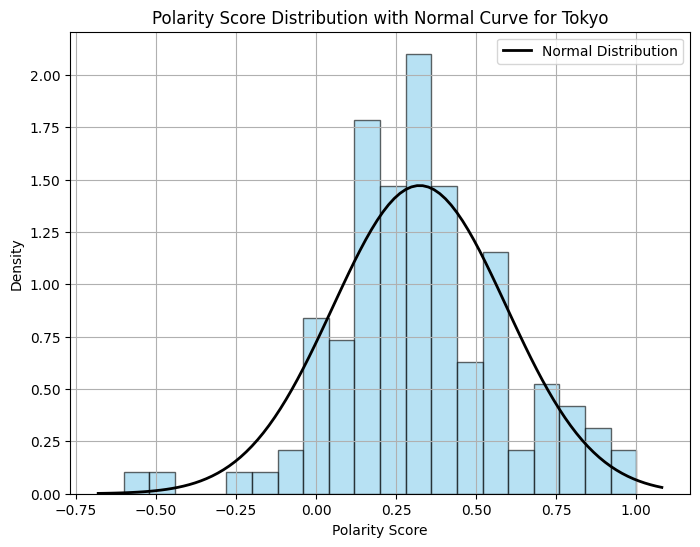

In [18]:
# Extract the 'polarity' column
polarity_scores = sample_unique_tokyo_reviews['Polarity']

# Plot the histogram of polarity scores
plt.figure(figsize=(8, 6))
plt.hist(polarity_scores, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.6)

# Calculate the mean and standard deviation of the polarity scores
mean = np.mean(polarity_scores)
std_dev = np.std(polarity_scores)

# Calculate the 95% confidence interval
confidence_interval = stats.norm.interval(0.95, loc=mean, scale=std_dev)
print(f"95% confidence interval: {confidence_interval}")


# Generate the normal distribution curve using the mean and std deviation
xmin, xmax = plt.xlim()  # Get the current x-axis limits of the histogram
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)  # Normal distribution

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Add labels and title
plt.title('Polarity Score Distribution with Normal Curve for Tokyo')
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()